In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step-1Import the necessary Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv('/content/drive/My Drive/project/Dataset/Auto_Insurance_Claims_amount.csv')
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [5]:
column_names=['Customer','Country',	'State Code',	'State',	'Claim Amount',	'Response','Coverage','Education',	'Effective To Date',	'EmploymentStatus','Gender','Income',	'Location Code',	'Marital Status',	'Monthly Premium Auto',	'Months Since Last Claim'	,'Months Since Policy Inception',	'Number of Open Complaints','Number of Policies','Policy Type',	'Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size','Total Claim Amount']
data = data.reindex(columns=column_names)

In [6]:
data.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Hail,Web,Four-Door Car,Medsize,198.234764
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,Four-Door Car,Medsize,379.200000
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,Four-Door Car,Medsize,790.784983
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,Four-Door Car,Large,691.200000
9133,Y167826,US,MO,Missouri,261.183687,No,Extended,College,2/14/11,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Other,Call Center,Two-Door Car,Medsize,369.600000


In [7]:
data.shape

(9134, 26)

In [8]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Vehicle Class                     object
Vehicle Size    

In [9]:
data.keys()

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Total Claim Amount'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [11]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
Total Claim Amount               0
dtype: int64

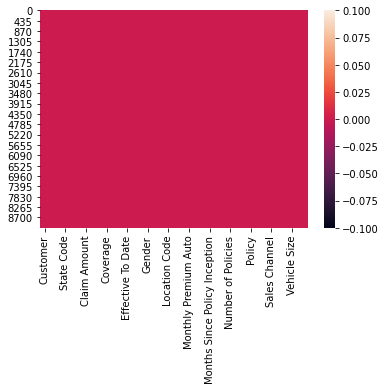

In [12]:
sns.heatmap(data.isnull())

In [13]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [14]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [15]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['Claim Amount', 'Total Claim Amount'], dtype='object')

In [16]:
data[Numerical].describe()#Describe the dataset Column Value 

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


In [17]:
data[Float].describe()#Describe the dataset Column Value 

,Claim Amount,Total Claim Amount
count,9134.000000,9134.000000
mean,800.494047,434.088794
std,687.096761,290.500092
min,189.800768,0.099007
25%,399.425179,272.258244
50%,578.018220,383.945434
75%,896.216704,547.514839
max,8332.538119,2893.239678


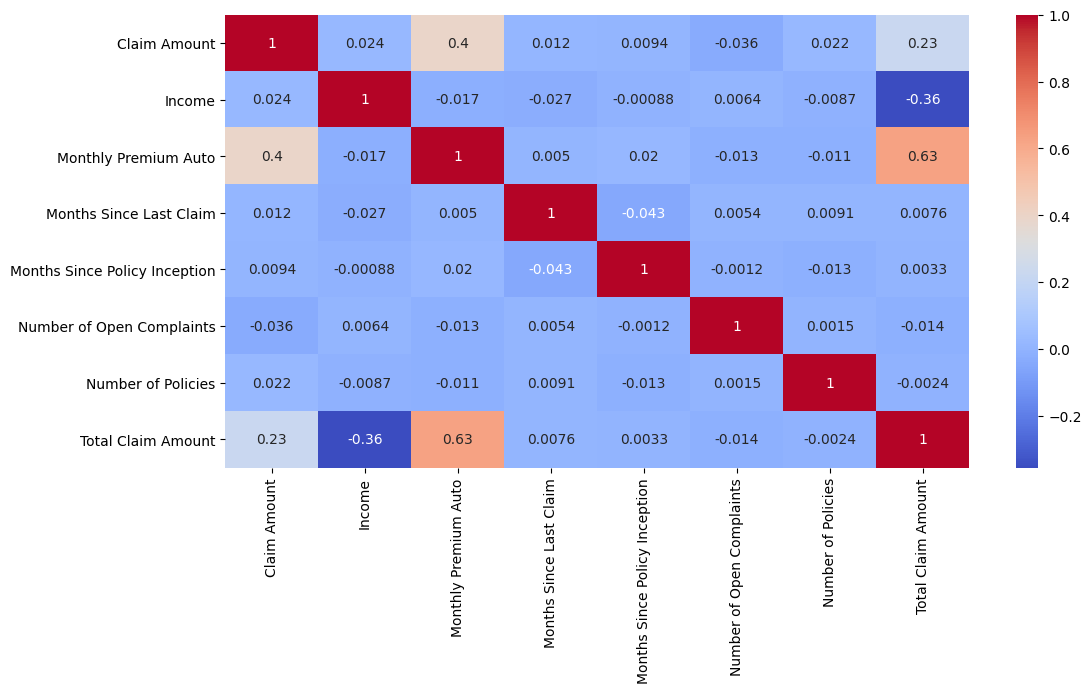

In [18]:
#Check the Correlation between columns 
corr_df = data.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [19]:
data.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Total Claim Amount'],
      dtype='object')

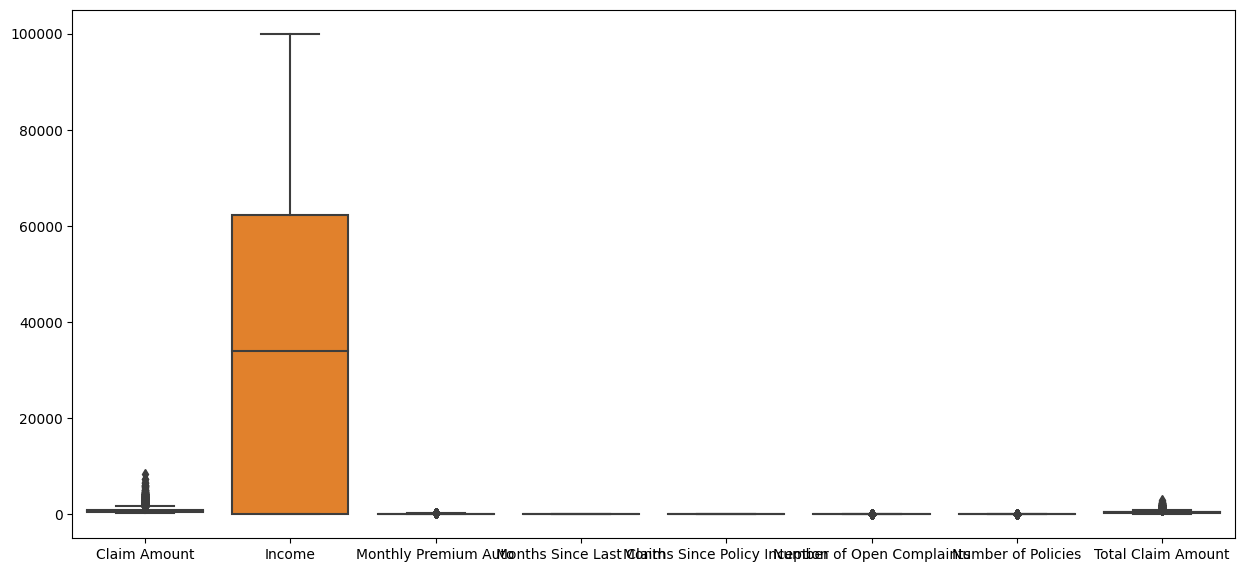

In [20]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Total Claim Amount']])

In [21]:
#Removing the Outliars With the Help of Quartiles Technique
from numpy import percentile
columns = data.columns
for j in columns:
    if isinstance(data[j][0], str) :
        continue
    else:
        for i in range(len(data)):
            #defining quartiles
            quartiles = percentile(data[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if data[j][i] > upper_fence:
                data[j][i] = upper_fence
            elif data[j][i] < lower_fence:
                data[j][i] = lower_fence

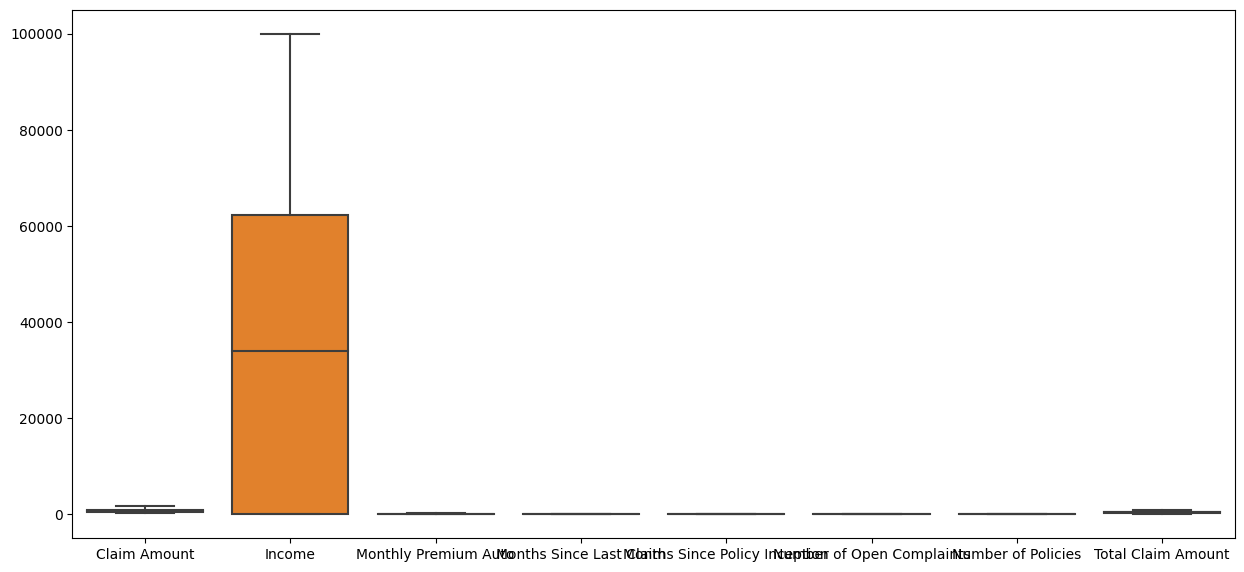

In [22]:
#Usnig the Box plot 
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Total Claim Amount']])

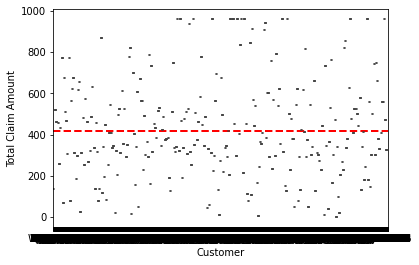

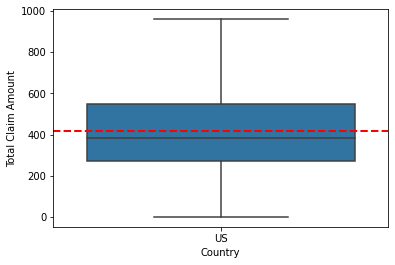

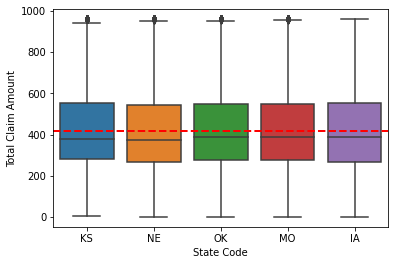

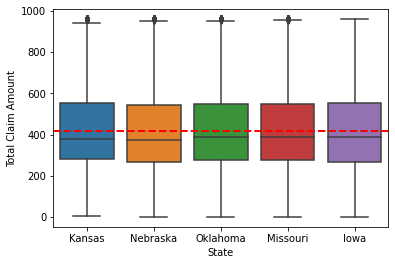

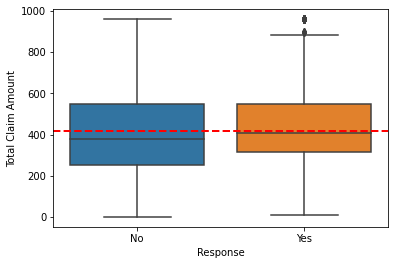

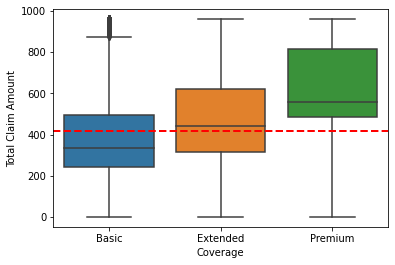

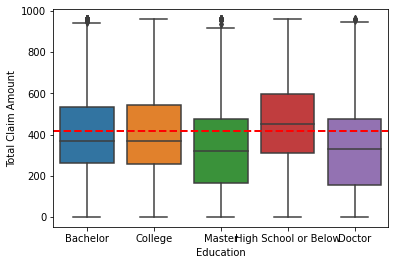

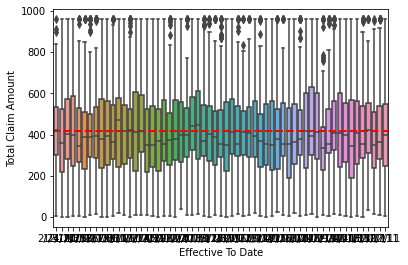

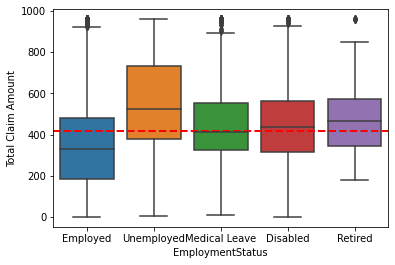

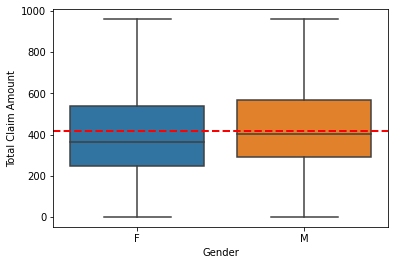

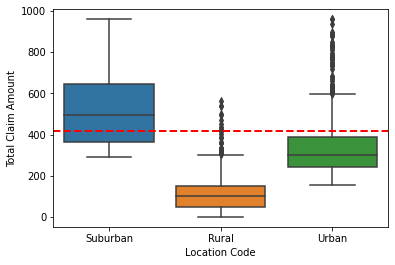

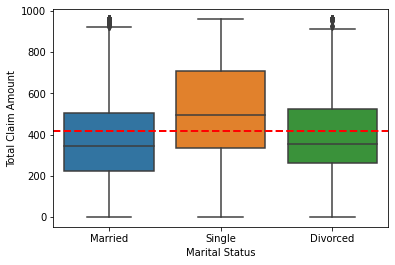

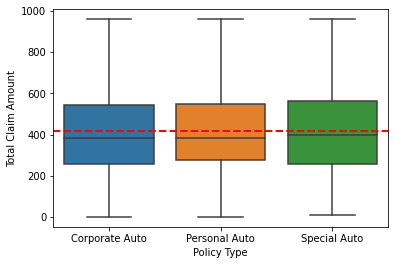

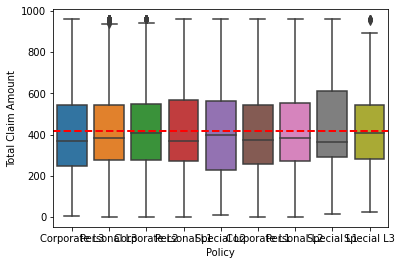

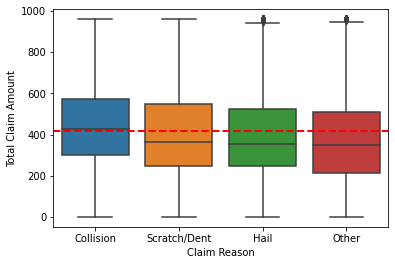

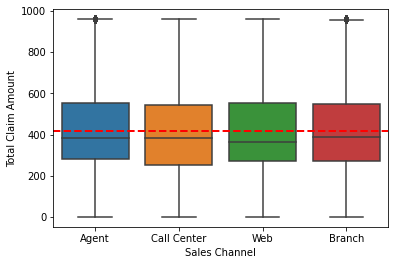

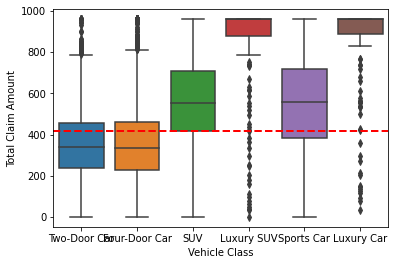

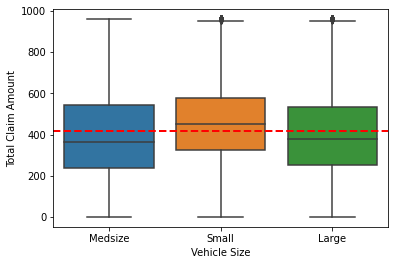

In [23]:
boxplot_vars = ['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

for var_i in boxplot_vars:
    temp_df_graph = pd.concat([data['Total Claim Amount'], data[var_i]], axis=1)
    fig = sns.boxplot(x=var_i, y="Total Claim Amount", data=temp_df_graph)
    plt.axhline(data['Total Claim Amount'].mean(),color='r',linestyle='dashed',linewidth=2)
    plt.show()
    #fig.figure.savefig("figs/" + var_i + "_box.png")
del temp_df_graph

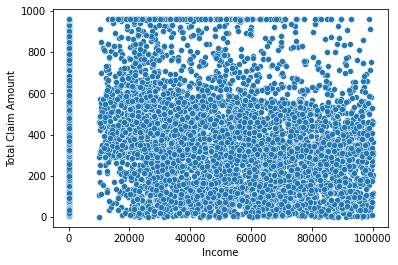

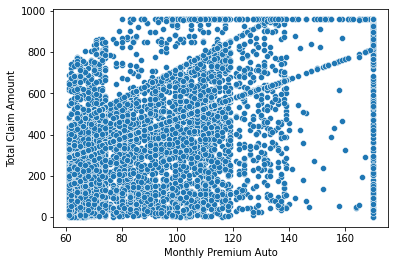

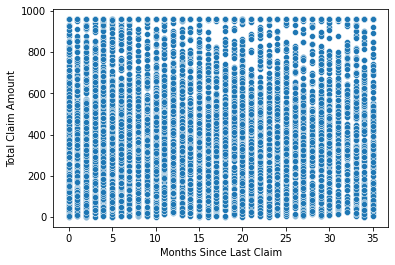

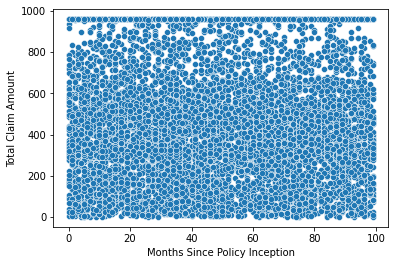

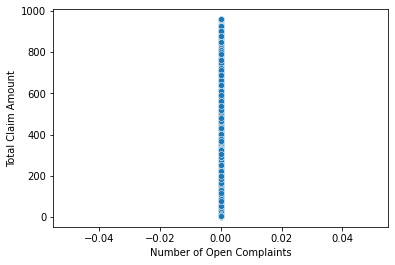

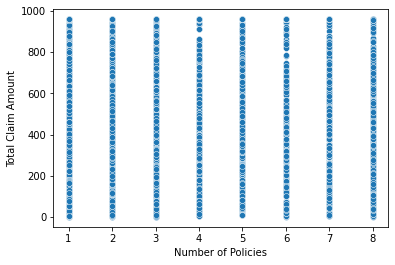

In [24]:
#TEST ASSUMPTION: LINEARITY
#show scatter plots
scatter_vars =['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies'] 

#scatter plots against y
for var_i in scatter_vars:
    fig = sns.scatterplot(x=data[var_i], y=data['Total Claim Amount'])
    plt.show()
    
    
    
    

In [25]:
data.head(2)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize,960.399730


In [26]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()

In [27]:
data['Country'].unique()#drop

array(['US'], dtype=object)

In [28]:
data['Response']= label_encoder.fit_transform(data['Response']) 

In [29]:
data['Coverage']= label_encoder.fit_transform(data['Coverage']) 

In [30]:
data['Location Code']= label_encoder.fit_transform(data['Location Code']) 

In [31]:
data['Gender']= label_encoder.fit_transform(data['Gender']) 

In [32]:
data['Marital Status']= label_encoder.fit_transform(data['Marital Status']) 

In [33]:
data['Vehicle Size']= label_encoder.fit_transform(data['Vehicle Size']) 


In [34]:
#Convert the column with help of pandas getdummies method 
data['State'] = pd.Categorical(data['State'])
dfDummies_State = pd.get_dummies(data['State'], prefix = 'State',drop_first = False)
dfDummies_State

,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
9129,0,0,1,0,0
9130,0,0,1,0,0
9131,0,0,1,0,0
9132,0,0,1,0,0


In [35]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_State], axis=1)
data=data.drop('State',axis=1)
data.head(2)

,Customer,Country,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma
0,BU79786,US,KS,276.351928,0,0,Bachelor,2/24/11,Employed,0,56274,1,1,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,1,384.811147,0,1,0,0,0
1,QZ44356,US,NE,697.953590,0,1,Bachelor,1/31/11,Unemployed,0,0,1,2,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,1,960.399730,0,0,0,1,0


In [36]:
#Convert the column with help of pandas getdummies method 
data['State Code'] = pd.Categorical(data['State Code'])
dfDummies_State_Code = pd.get_dummies(data['State Code'], prefix = 'State Code',drop_first = False)
dfDummies_State_Code

,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
9129,0,0,1,0,0
9130,0,0,1,0,0
9131,0,0,1,0,0
9132,0,0,1,0,0


In [37]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_State_Code], axis=1)
data=data.drop('State Code',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK
0,BU79786,US,276.351928,0,0,Bachelor,2/24/11,Employed,0,56274,1,1,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0
1,QZ44356,US,697.953590,0,1,Bachelor,1/31/11,Unemployed,0,0,1,2,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0


In [38]:
#Convert the column with help of pandas getdummies method 
data['Education'] = pd.Categorical(data['Education'])
dfDummies_Education = pd.get_dummies(data['Education'], prefix = 'Education',drop_first = False)
dfDummies_Education

,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
9129,1,0,0,0,0
9130,0,1,0,0,0
9131,1,0,0,0,0
9132,0,1,0,0,0


In [39]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_Education], axis=1)
data=data.drop('Education',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,BU79786,US,276.351928,0,0,2/24/11,Employed,0,56274,1,1,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,QZ44356,US,697.953590,0,1,1/31/11,Unemployed,0,0,1,2,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [40]:
#Convert the column with help of pandas getdummies method 
data['EmploymentStatus'] = pd.Categorical(data['EmploymentStatus'])
dfDummies_EmploymentStatus = pd.get_dummies(data['EmploymentStatus'], prefix = 'EmploymentStatus',drop_first = False)
dfDummies_EmploymentStatus

,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
9129,0,1,0,0,0
9130,0,1,0,0,0
9131,0,0,0,0,1
9132,0,1,0,0,0


In [41]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_EmploymentStatus], axis=1)
data=data.drop('EmploymentStatus',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,BU79786,US,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,QZ44356,US,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [42]:
#Convert the column with help of pandas getdummies method 
data['Policy Type'] = pd.Categorical(data['Policy Type'])
dfDummies_Policy_Type = pd.get_dummies(data['Policy Type'], prefix = 'Policy Type',drop_first = False)
dfDummies_Policy_Type

,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
9129,0,1,0
9130,1,0,0
9131,1,0,0
9132,0,1,0


In [43]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_Policy_Type], axis=1)
data=data.drop('Policy Type',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto
0,BU79786,US,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,Corporate L3,Collision,Agent,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,QZ44356,US,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,Personal L3,Scratch/Dent,Agent,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [44]:
#Convert the column with help of pandas getdummies method 
data['Policy'] = pd.Categorical(data['Policy'])
dfDummies_Policy = pd.get_dummies(data['Policy'], prefix = 'Policy',drop_first = False)
dfDummies_Policy

,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9129,0,0,0,1,0,0,0,0,0
9130,0,0,1,0,0,0,0,0,0
9131,0,1,0,0,0,0,0,0,0
9132,0,0,0,0,1,0,0,0,0


In [45]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_Policy], axis=1)
data=data.drop('Policy',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,BU79786,US,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,Collision,Agent,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,QZ44356,US,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,Scratch/Dent,Agent,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [46]:
#Convert the column with help of pandas getdummies method 
data['Claim Reason'] = pd.Categorical(data['Claim Reason'])
dfDummies_Claim_Reason = pd.get_dummies(data['Claim Reason'], prefix = 'Claim Reason',drop_first = False)
dfDummies_Claim_Reason

,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
9129,0,1,0,0
9130,1,0,0,0
9131,1,0,0,0
9132,0,0,0,1


In [47]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_Claim_Reason], axis=1)
data=data.drop('Claim Reason',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent
0,BU79786,US,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,Agent,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,QZ44356,US,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,Agent,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [48]:
#Convert the column with help of pandas getdummies method 
data['Sales Channel'] = pd.Categorical(data['Sales Channel'])
dfDummies_Sales_Channel = pd.get_dummies(data['Sales Channel'], prefix = 'Sales Channel',drop_first = False)
dfDummies_Sales_Channel

,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
9129,0,0,0,1
9130,0,1,0,0
9131,0,1,0,0
9132,0,1,0,0


In [49]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_Sales_Channel], axis=1)
data=data.drop('Sales Channel',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Vehicle Class,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,BU79786,US,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,Two-Door Car,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,QZ44356,US,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,Four-Door Car,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [50]:
#Convert the column with help of pandas getdummies method 
data['Vehicle Class'] = pd.Categorical(data['Vehicle Class'])
dfDummies_Vehicle_Class = pd.get_dummies(data['Vehicle Class'], prefix = 'Vehicle Class',drop_first = False)
dfDummies_Vehicle_Class

,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9129,1,0,0,0,0,0
9130,1,0,0,0,0,0
9131,1,0,0,0,0,0
9132,1,0,0,0,0,0


In [51]:
#Concat it with the dataset 
data = pd.concat([data,dfDummies_Vehicle_Class], axis=1)
data=data.drop('Vehicle Class',axis=1)
data.head(2)

,Customer,Country,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,BU79786,US,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,QZ44356,US,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [52]:
data=data.drop('Country',axis=1)

In [53]:
data.head(2)

,Customer,Claim Amount,Response,Coverage,Effective To Date,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Vehicle Size,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,BU79786,276.351928,0,0,2/24/11,0,56274,1,1,69,32,5,0,1,1,384.811147,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,QZ44356,697.953590,0,1,1/31/11,0,0,1,2,94,13,42,0,8,1,960.399730,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [54]:
data.shape

(9134, 62)

In [55]:
#x=data[['Months Since Last Claim','Months Since Policy Inception','Number of Policies','Income','Number of Open Complaints']].copy()
x=data.drop(['Total Claim Amount','Customer','Effective To Date'],axis=1)
y=data['Total Claim Amount']

In [56]:
x.shape

(9134, 59)

In [57]:
y.shape

(9134,)

In [58]:
y=y.values.reshape(-1,1)

In [59]:
y.shape

(9134, 1)

In [60]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection=selection.fit(x,y)

In [61]:
print(selection.feature_importances_)

[7.07805508e-03 8.40131220e-03 1.12289709e-02 5.03267414e-03
 6.17862287e-03 4.49389261e-01 2.61007757e-02 3.09009377e-01
 7.40258366e-03 7.64139617e-03 0.00000000e+00 6.00785130e-03
 7.23158486e-03 1.68634158e-03 1.38317813e-03 1.78735031e-03
 1.47520910e-03 1.25412413e-03 1.68264816e-03 1.24572859e-03
 1.68774733e-03 1.46611078e-03 1.25540375e-03 3.49877269e-03
 3.42826708e-03 1.21483461e-03 4.09559908e-03 2.30300183e-03
 7.66582462e-04 3.55409475e-02 1.32496044e-03 8.39587596e-04
 1.74320100e-02 1.12932284e-03 1.43240142e-03 8.64883901e-04
 1.18927426e-03 1.37295028e-03 1.79902189e-03 3.12665988e-03
 2.73934520e-03 3.20294040e-03 3.61552169e-04 6.09544397e-04
 7.26332858e-04 3.25010628e-03 3.43051273e-03 2.39610966e-03
 2.35796577e-03 3.16574624e-03 3.99439248e-03 3.14161109e-03
 2.50367009e-03 3.01847620e-03 8.76371261e-04 1.41296983e-03
 1.06029358e-02 2.31066906e-03 2.91336353e-03]


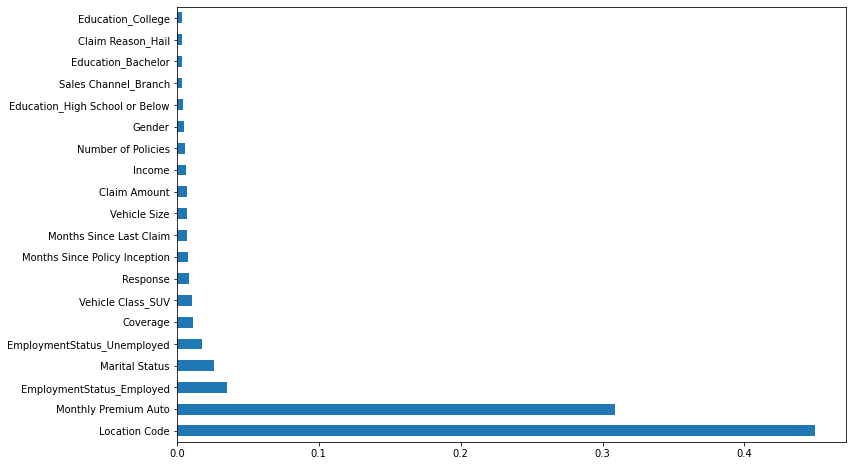

In [62]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [63]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(selection, prefit=True)
x = selector.transform(x)

In [64]:
x.shape

(9134, 5)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [66]:
x_train.shape

(6393, 5)

In [67]:
x_test.shape

(2741, 5)

In [68]:
y_train.shape

(6393, 1)

In [69]:
y_test.shape

(2741, 1)

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lr.coef_

array([[ 115.11450174,   39.66210618,    4.82769452, -114.95081812,
          69.53030376]])

In [72]:
lr.intercept_

array([-125.69657498])

In [73]:
lr.score(x_train,y_train)

0.5659111499264152

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [75]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score

In [76]:
def dtcker(cer):
    dtc=DecisionTreeRegressor(criterion=cer,max_depth=5,min_samples_split=5,
                           max_leaf_nodes=10,random_state = 0) 
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    print(' prediction \n',pred)
    dtc.fit(x,y)
    print("R-Squared on train dataset={}".format(dtc.score(x_test,y_test)))
    dtc.fit(x_test,y_test)   
    print("R-Squaredon test dataset={}".format(dtc.score(x_test,y_test)))
    print('error')
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("mean square error",mean_squared_error(y_test,pred))
    print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score',r2_score(y_test,pred))
    
    
   

In [77]:
dtcker('mse')

 prediction 
 [108.87583465 368.80609031 517.30574201 ... 613.15702538 108.87583465
 420.15085561]
R-Squared on train dataset=0.8079086004187925
R-Squaredon test dataset=0.8090220930877505
error
mean absolute error: 78.79733078614008
mean square error 10917.275390066154
rooot mean square error 104.48576644723506
r2_score 0.8063061016800498


In [78]:
dtcker('friedman_mse')

 prediction 
 [108.87583465 368.80609031 517.30574201 ... 613.15702538 108.87583465
 420.15085561]
R-Squared on train dataset=0.8079086004187925
R-Squaredon test dataset=0.8090220930877505
error
mean absolute error: 78.79733078614008
mean square error 10917.275390066154
rooot mean square error 104.48576644723506
r2_score 0.8063061016800498


In [79]:
dtcker('mae')

 prediction 
 [ 97.410282 446.4      528.       ... 651.660895  97.410282 392.826082]
R-Squared on train dataset=0.7742559064296854
R-Squaredon test dataset=0.7929297580031459
error
mean absolute error: 78.01611358705766
mean square error 12977.5560355575
rooot mean square error 113.91907669726568
r2_score 0.7697526782662301


In [80]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeRegressor(random_state = 0)

In [81]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid_cv_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_cv_dtc.fit(x,y)
print("R-Squared::{}".format(grid_cv_dtc.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtc.best_params_))

R-Squared::0.8507095859852238
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [ ]:
from sklearn.externals import joblib
joblib.dump(dtc,'insuranceclaim.pkl')